# **Final Project: Bioinformatics**

---

Elad David (206760274) & Inbar Shmaya (208774026) & Dana Brudo (318379914)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!pip install biopython

import os
import re
import math
import Bio
from Bio import Entrez, SeqIO, Align
from Bio.Align import substitution_matrices
from Bio.codonalign.codonseq import CodonSeq, cal_dn_ds
import csv
from matplotlib_venn import venn2
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt

Mounted at /content/drive
     |████████████████████████████████| 2.3 MB 5.1 MB/s 


/usr/local/lib/python3.7/dist-packages/Bio/codonalign/__init__.py:26: BiopythonExperimentalWarning: Bio.codonalign is an experimental module which may undergo significant changes prior to its future official release.
  BiopythonExperimentalWarning,


# **Part A:** Bacillus Subtilis - GeneBank

In [ ]:
def load_data(data_path):
  """
  Loads data from a GeneBank file.

  Parameters:
  data_path(string): The file path of the GeneBank file.

  Returns:
  records(list): Different types of areas in the genome.
  """
  assert os.path.exists(data_path), 'ERROR: GeneBank file not found'

  records = []
  with open(data_path) as handle:
    for record in SeqIO.parse(handle, "genbank"):   # In case there are more than 1 record in the file
      records.append(record.upper())
  return records


data_path = '/content/BS168.gb'
records = load_data(data_path)

**Question 1:** Knowing and counting the elemnts in the genome

In [ ]:
def count_areas_types():
  """
  Maps the areas in the Bacillus Subtilis genome
  and counts for each its number of appearances.

  Parameters:
  None

  Returns:
  mapping_dict(dictionary): The keys are the different types of areas in the
  genome and the values are its number of appearances.
  """
  mapping_dict = {}
  for rec in records:
    for feature in rec.features:
        if feature.type == "source":
          continue
        if not feature.type in mapping_dict:
          mapping_dict[feature.type] = 1
        else:
          mapping_dict[feature.type] += 1
  return mapping_dict


mapping_dict = count_areas_types()
print(mapping_dict)

{'gene': 4536, 'CDS': 4237, 'rRNA': 30, 'tRNA': 86, 'misc_RNA': 93, 'misc_feature': 89, 'ncRNA': 2}


**Question 2:** Charactarizing genes lengths

Section A:  {0: 1341, 1: 1137, 2: 216, 3: 1113, 4: 246, 5: 1917, 6: 2466, 7: 1555, 8: 77, 9: 76, 10: 2928, 11: 119, 12: 948, 13: 1467, 14: 1332, 15: 885, 16: 591, 17: 213, 18: 1278, 19: 93, 20: 654, 21: 624, 22: 1284, 23: 546, 24: 486, 25: 354, 26: 1692, 27: 324, 28: 597, 29: 225, 30: 264, 31: 1554, 32: 77, 33: 76, 34: 2927, 35: 119, 36: 195, 37: 615, 38: 1161, 39: 1443, 40: 639, 41: 330, 42: 441, 43: 990, 44: 828, 45: 360, 46: 744, 47: 300, 48: 879, 49: 291, 50: 1995, 51: 768, 52: 1314, 53: 561, 54: 879, 55: 873, 56: 261, 57: 186, 58: 870, 59: 858, 60: 378, 61: 294, 62: 1371, 63: 954, 64: 615, 65: 567, 66: 231, 67: 3534, 68: 537, 69: 1599, 70: 1470, 71: 261, 72: 303, 73: 636, 74: 378, 75: 387, 76: 77, 77: 72, 78: 2484, 79: 738, 80: 1017, 81: 1419, 82: 543, 83: 1914, 84: 777, 85: 876, 86: 894, 87: 927, 88: 1413, 89: 585, 90: 882, 91: 858, 92: 363, 93: 504, 94: 210, 95: 1002, 96: 1500, 97: 1554, 98: 2928, 99: 118, 100: 76, 101: 76, 102: 76, 103: 83, 104: 75, 105: 86, 106: 77, 107: 77, 1

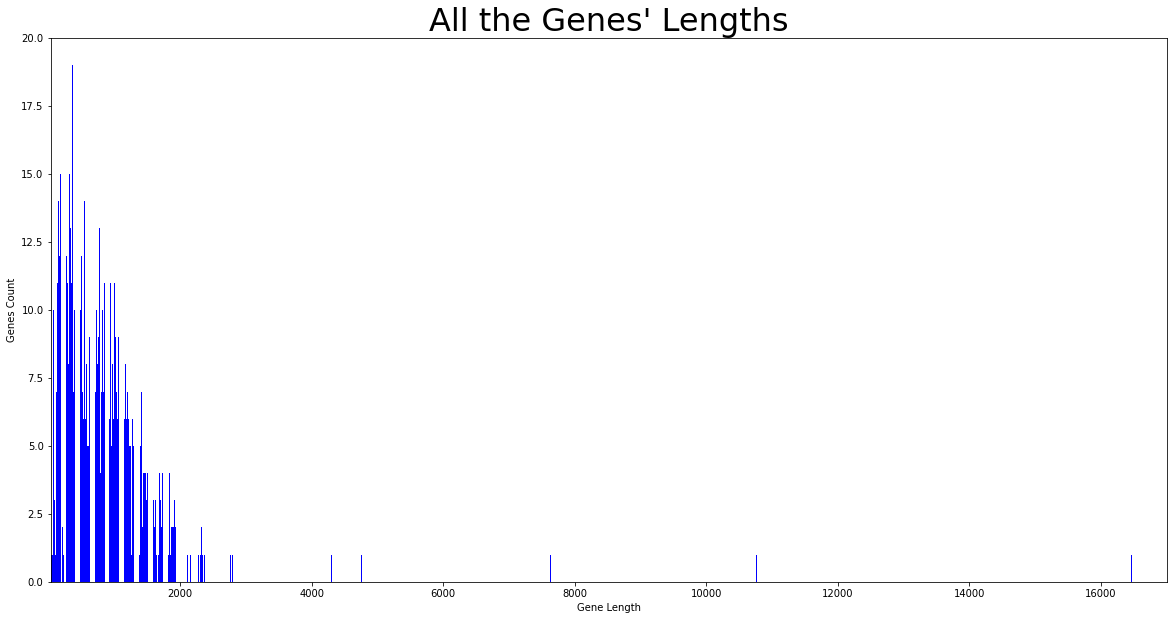

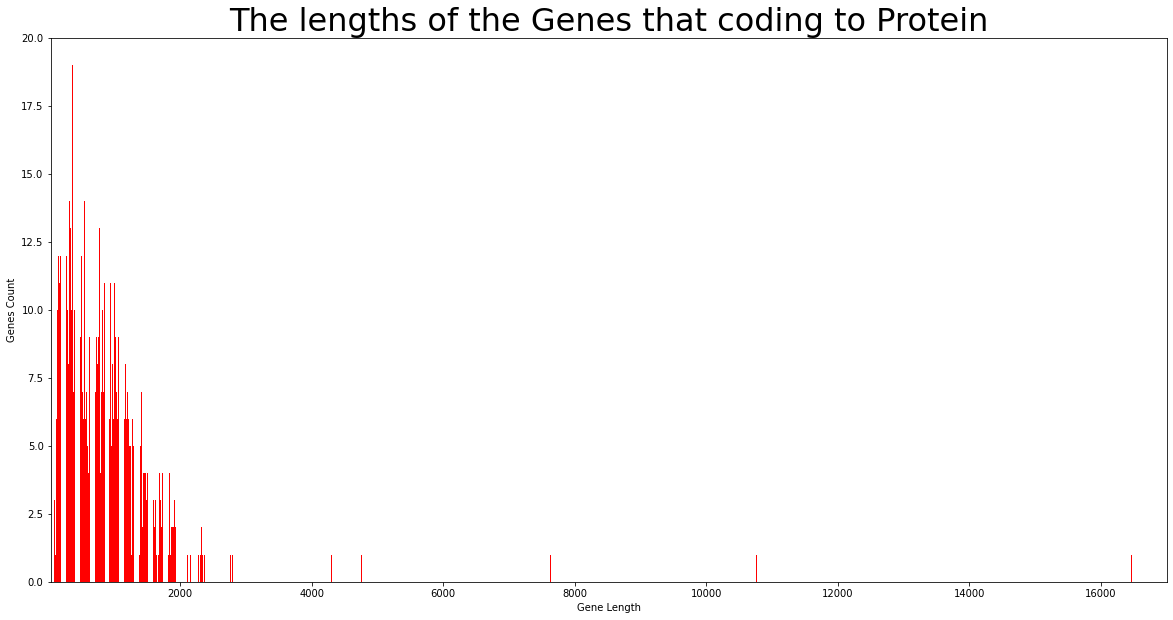

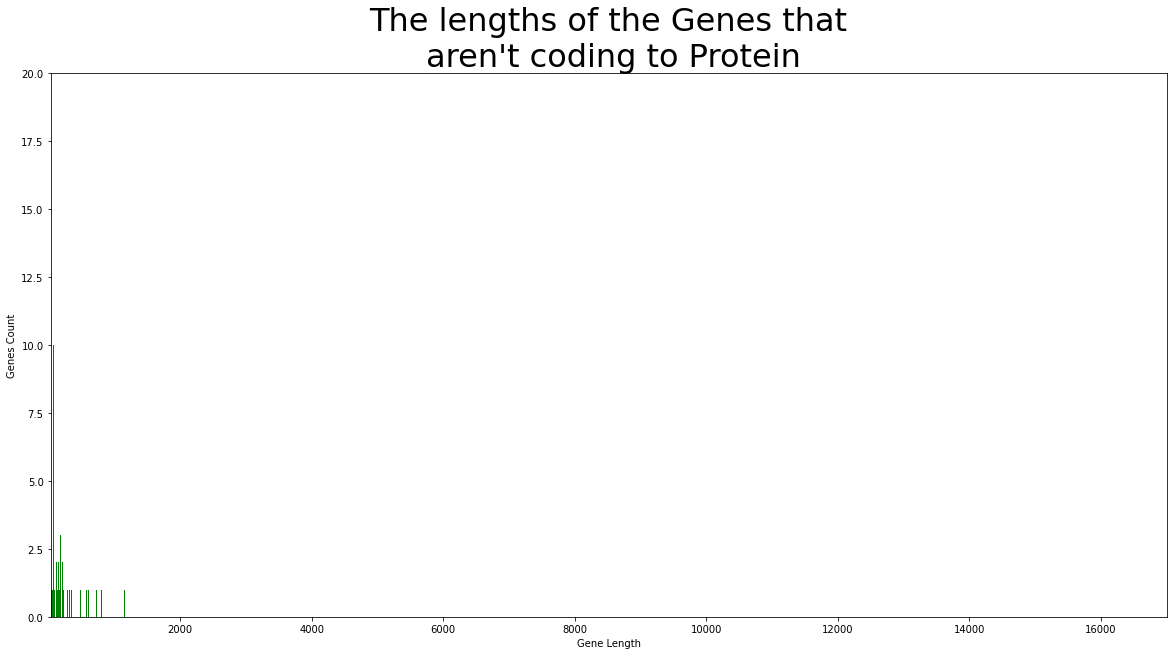

In [ ]:
def get_genes_lengths():
  """
  Computes the length of each gene.
  Creates a dictionary containing the genes and their lengths.

  Parameters:
  None

  Returns:
  genes_lengths_dict(dictionary): The keys are the indeces of the genes (inner
  count) and the values are their lengths. 
  """
  genes_lengths_dict = {}
  count = 0
  for rec in records:
    for feature in rec.features:
      if feature.type == "gene":
        genes_lengths_dict[count] = feature.location.end - feature.location.start
        count += 1
  return genes_lengths_dict


def divide_genes():
  """
  Creates two lists containing the genes' groups: protein-coding genes,
  and the rest.

  Parameters:
  None

  Returns:
  two_genes_groups(list): list which contains:
    list_1: The lengths of the genes that protein-coding genes.
    list_2: The lengths of the rest of the genes. 
  """
  list_1 = []
  list_2 = []
  for rec in records:
    for feature in rec.features:
      if feature.type == "CDS":
        list_1.append(feature.location.end - feature.location.start)
      elif feature.type != "CDS" and feature.type != "gene" and feature.type != "source":
        list_2.append(feature.location.end - feature.location.start)
  two_genes_groups = []
  two_genes_groups.append(list_1)
  two_genes_groups.append(list_2)
  return two_genes_groups


def lengths_statistics(two_genes_groups):
  """
  Prints the average length, minimum length and the maximum length for each
  genes group.

  Parameters:
  two_genes_groups(list): list which contains:
    list_1: The genes' lengths of the protein-coding genes.
    list_2: The lengths of the rest of the genes.

  Returns:
  None
  """
  protein_length = 0
  protein_max = two_genes_groups[0][0]
  protein_min = two_genes_groups[0][0]
  for i in range(len(two_genes_groups[0])):
    current = two_genes_groups[0][i]
    protein_length += current
    if current < protein_min:
      protein_min = current
    if current > protein_max:
      protein_max = current

  rest_length = 0
  rest_max = two_genes_groups[1][0]
  rest_min = two_genes_groups[1][0]
  for i in range(len(two_genes_groups[1])):
    current = two_genes_groups[1][i]
    rest_length += current
    if current < rest_min:
      rest_min = current
    if current > rest_max:
      rest_max = current

  print("Average length of the protein-coding genes: ", protein_length / len(two_genes_groups[0]))
  print("Maximum length of the protein-coding genes: ", protein_max)
  print("Minimum length of the protein-coding genes: ", protein_min)
  print()
  print("Average length of the genes that aren't coding to protein: ", rest_length / len(two_genes_groups[1]))
  print("Maximum length of the genes that aren't coding to protein: ", rest_max)
  print("Minimum length of the genes that aren't coding to protein: ", rest_min)


def draw_histogrms_lengths(genes_lengths_dict, two_genes_groups):
  """
  Draws three histograms:
    1. Lengths of all the genes.
    2. Lengths of the protein-coding genes.
    3. Lengths of the rest of the genes.

  Parameters:
  genes_lengths_dict(dictionary): The keys are the indeces of the genes (inner
  count) and the values are their lengths.
  two_genes_groups(list): list which contains:
    list_1: The genes' lengths of the protein-coding genes.
    list_2: The lengths of the rest of the genes.

  Returns:
  None
  """
  all_genes_dict = {}
  for key in genes_lengths_dict:
    current_length = genes_lengths_dict[key]
    if not current_length in all_genes_dict:
      all_genes_dict[current_length] = 1
    else:
      all_genes_dict[current_length] += 1

  protein_genes_dict = {}
  for i in range(len(two_genes_groups[0])):
    current_length = two_genes_groups[0][i]
    if not current_length in protein_genes_dict:
      protein_genes_dict[current_length] = 1
    else:
      protein_genes_dict[current_length] += 1

  rest_genes_dict = {}
  for i in range(len(two_genes_groups[1])):
    current_length = two_genes_groups[1][i]
    if not current_length in rest_genes_dict:
      rest_genes_dict[current_length] = 1
    else:
      rest_genes_dict[current_length] += 1

  sum = 0
  for key in all_genes_dict:
    sum += all_genes_dict[key]
  for key in protein_genes_dict:
    sum += protein_genes_dict[key]
  for key in rest_genes_dict:
    sum += rest_genes_dict[key]
  print("Sanity check: The number of all the genes is", sum)

  f = plt.figure()
  f.set_figwidth(20)
  f.set_figheight(10)

  ax1 = plt.axes()
  ax1.bar(all_genes_dict.keys(), all_genes_dict.values(), width=2, color = 'blue')
  plt.xlim([30, 17000])
  plt.ylim([0, 20])
  ax1.set_xlabel('Gene Length')
  ax1.set_ylabel('Genes Count')
  ax1.set_title("All the Genes' Lengths", size = 32)
  plt.show()

  f = plt.figure()
  f.set_figwidth(20)
  f.set_figheight(10)

  ax2 = plt.axes()
  ax2.bar(protein_genes_dict.keys(), protein_genes_dict.values(), width=2, color = 'red')
  plt.xlim([30, 17000])
  plt.ylim([0, 20])
  ax2.set_xlabel('Gene Length')
  ax2.set_ylabel('Genes Count')
  ax2.set_title("The lengths of the Genes that coding to Protein", size = 32)
  plt.show()

  f = plt.figure()
  f.set_figwidth(20)
  f.set_figheight(10)

  ax3 = plt.axes()
  ax3.bar(rest_genes_dict.keys(), rest_genes_dict.values(), width = 2, color = 'green')
  plt.xlim([30, 17000])
  plt.ylim([0, 20])
  ax3.set_xlabel('Gene Length')
  ax3.set_ylabel('Genes Count')
  ax3.set_title("The lengths of the Genes that\n aren't coding to Protein", size = 32)
  plt.show()



genes_lengths_dict = get_genes_lengths()
print("Section A: ", genes_lengths_dict)
print()
two_genes_groups = divide_genes()
print("Section B: ", two_genes_groups)
print()
print("Section C:")
lengths_statistics(two_genes_groups)
print()
print("Section D:")
draw_histogrms_lengths(genes_lengths_dict, two_genes_groups)

**Question 3:** Calculating GC%

Section A: %GC of the whole genome:  43.51440813017155 %

Section B: %GC of the protein coding genes:  {ExactPosition(409): 40.1193139448173, ExactPosition(1938): 39.92963940193492, ExactPosition(3205): 43.51851851851852, ExactPosition(3436): 45.55256064690027, ExactPosition(4566): 36.99186991869919, ExactPosition(4866): 45.01825769431404, ExactPosition(6993): 44.40389294403893, ExactPosition(14846): 34.59915611814346, ExactPosition(15914): 43.49011588275392, ExactPosition(17533): 40.54054054054054, ExactPosition(19061): 45.98870056497175, ExactPosition(19967): 46.36209813874789, ExactPosition(20879): 44.44444444444444, ExactPosition(22495): 37.61467889908257, ExactPosition(23145): 40.544871794871796, ExactPosition(23867): 45.95015576323988, ExactPosition(25220): 37.72893772893773, ExactPosition(25851): 45.47325102880658, ExactPosition(26813): 43.557919621749406, ExactPosition(28528): 39.50617283950617, ExactPosition(28866): 43.21608040201005, ExactPosition(29480): 37.77777777777778, E

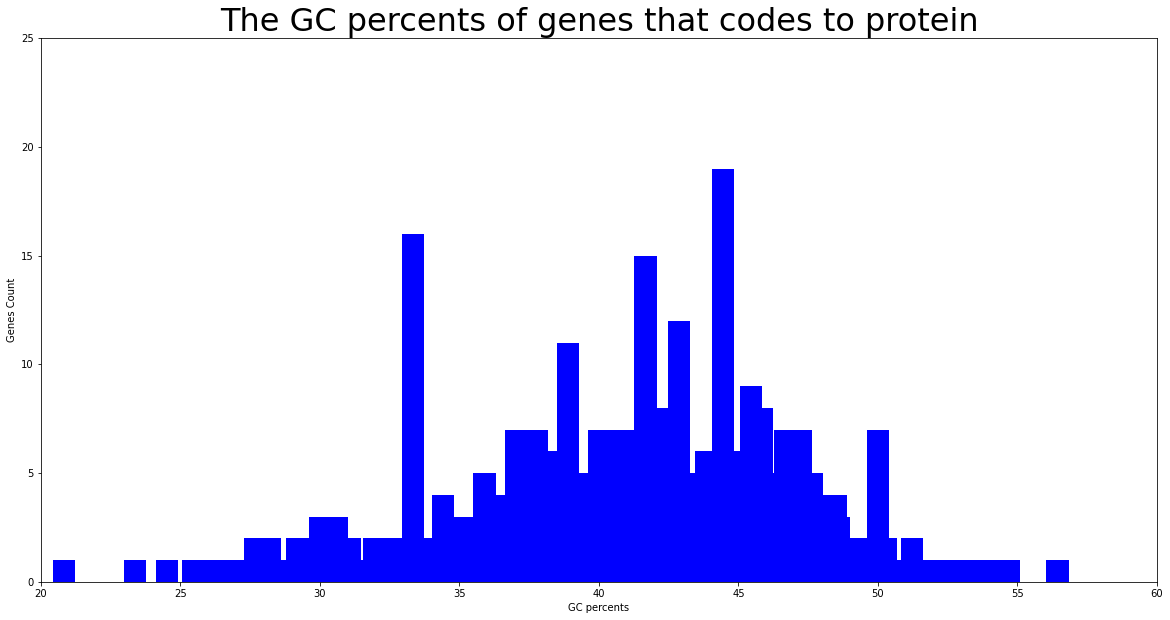


Section E: 
Five lowest genes: 
1 | name:  yqaD | gene details:  [2699509:2699677](-) | GC percents:  20.833333333333336 %
2 | name:  cotC | gene details:  [1904994:1905195](-) | GC percents:  23.383084577114428 %
3 | name:  cotU | gene details:  [1901116:1901377](-) | GC percents:  24.521072796934863 %
4 | name:  rtbE | gene details:  [4036343:4036787](-) | GC percents:  25.45045045045045 %
5 | name:  yydC | gene details:  [4132337:4132736](-) | GC percents:  25.81453634085213 %

Five highest genes: 
1 | name:  rhgX | gene details:  [772141:773980](+) | GC percents:  53.833605220228385 %
2 | name:  ydaS | gene details:  [492653:492911](-) | GC percents:  54.263565891472865 %
3 | name:  aag | gene details:  [3964277:3964868](-) | GC percents:  54.314720812182735 %
4 | name:  epsM | gene details:  [3516232:3516883](-) | GC percents:  54.68509984639017 %
5 | name:  nnrA | gene details:  [3972447:3973278](-) | GC percents:  56.438026474127554 %


In [ ]:
def GC_percents_whole_genome():
  """
  Calculates the %GC of the whole genome of Bacillus Subtilis.

  Parameters:
  None

  Returns:
  GC_percent (float): The %GC of the whole genome of Bacillus Subtilis.
  """
  counter_G = 0
  counter_C = 0
  genome_len = 0
  for record in records:
    genome_len += len(record.seq)
    counter_G += record.seq.count('G') 
    counter_C += record.seq.count('C') 
  GC_percent = ((counter_C + counter_G) / genome_len) * 100
  return GC_percent


def GC_percents_CDS_genes(protein_list):
  """
  Calculates the %GC for the protein-coding genes.
  Prints the average of the %GC of them.

  Parameters:
  protein_list(list): The lengths of the protein-coding genes.

  Returns:
  GC_percents_dict(dictionary): The keys are the start location of the genes and
  the values are the %GC of the protein-coding genes.
  """
  GC_percents_dict = {}
  counter_GC = 0
  CDS_gene = ''
  for rec in records:
    for feature in rec.features:
      if feature.type == "CDS":
        CDS_gene = rec.seq[feature.location.start:feature.location.end]
        counter_GC += CDS_gene.count('G') 
        counter_GC += CDS_gene.count('C') 
        GC_percents_dict[feature.location.start] = (counter_GC / len(CDS_gene)) * 100
        counter_GC = 0
  return GC_percents_dict


def GC_percents_average_comparsion(GC_percents_whole_genome, GC_percents_list):
  """
  Compares the average that was calculated at section A and Section B.

  Parameters:
  GC_percents_whole_genome(float): The %GC of the whole genome of Bacillus Subtilis.
  GC_percents_list(list of floats): The %GC of the protein-coding genes.

  Returns:
  None
  """
  sum_B = 0
  average_A = GC_percents_whole_genome
  list_len = len(GC_percents_list)
  for percent in GC_percents_list:
    sum_B += GC_percents_list[percent]
  average_B = sum_B / list_len

  print("Average of section A: " , average_A)
  print("Average of section B: " ,average_B) 

  if average_A > average_B:
    print("Section A wins!")
  else:
    print("Section B wins!")


def draw_histogram_GC_percents(GC_percents_protein_coding_genes):
  """
  Draws the %GC histogram of the protein-coding genes.

  Parameters:
  GC_percents_protein_coding_genes(list of floats): The %GC of the protein-coding genes.

  Returns:
  None
  """
  GC_percents_dict = {}
  for percent in GC_percents_protein_coding_genes.values():
    if not percent in GC_percents_dict:
      GC_percents_dict[percent] = 1
    else:
      GC_percents_dict[percent] += 1

  f = plt.figure()
  f.set_figwidth(20)
  f.set_figheight(10)

  ax1 = plt.axes()
  ax1.bar(GC_percents_dict.keys(), GC_percents_dict.values(), color = 'blue')
  plt.xlim([20, 60])
  plt.ylim([0, 25])
  ax1.set_xlabel('GC percents')
  ax1.set_ylabel('Genes Count')
  ax1.set_title("The GC percents of genes that codes to protein", size = 32)
  plt.show()


def find_gene_details(start, GC_percent, index):
  """
  Gets the start position of a gene and finds it.
  Prints its name, start location, end location, strand and %GC.

  Parameters:
  start(integer): The start location of the gene.
  GC_percent(float): The %GC for the protein-coding genes.
  index(integer): The gene's index (inner use).

  Returns:
  None
  """
  for rec in records:
    for feature in rec.features:
      if feature.location.parts[0]._start.position == start and feature.type == "gene":
        print(index , "| name: " ,feature.qualifiers.get("gene")[0],
              "| gene details: ", feature.location.parts[0], "| GC percents: " , GC_percent, "%")
        
  
def five_highest_and_lowest_GC_percents_genes(GC_percents_protein_coding_genes):
  """
  Prints five protein-coding genes with the highest %GC.
  Prints five protein-coding genes with the lowest %GC.
  Prints their name, start location, end location, strand and %GC.

  Parameters:
  GC_percents_protein_coding_genes(list of floats): The %GC of the protein-coding genes.

  Returns:
  None
  """
  five_highest = []
  five_lowest = []
  sorted_genes_dict = dict(sorted(GC_percents_protein_coding_genes.items(), key=lambda item: item[1]))
  sorted_keys_list = list(sorted_genes_dict.keys())
  five_lowest = sorted_keys_list[:5]
  five_highest = sorted_keys_list[-5:]
  counter = 1
  print("Five lowest genes: ")
  for gene in five_lowest:
    find_gene_details(gene, sorted_genes_dict[gene], counter)
    counter += 1

  counter = 1
  print()
  print("Five highest genes: ")
  for gene in five_highest:
    find_gene_details(gene, sorted_genes_dict[gene], counter)
    counter += 1
  


GC_percents_whole_genome = GC_percents_whole_genome()
GC_percents_protein_coding_genes = GC_percents_CDS_genes(two_genes_groups[0])
print("Section A: %GC of the whole genome: " ,GC_percents_whole_genome, "%")
print()
print("Section B: %GC of the protein coding genes: " ,GC_percents_protein_coding_genes)
print()
print("Section C: ")
GC_percents_average_comparsion(GC_percents_whole_genome, GC_percents_protein_coding_genes)
print()
print("Section D: ")
draw_histogram_GC_percents(GC_percents_protein_coding_genes)
print()
print("Section E: ")
five_highest_and_lowest_GC_percents_genes(GC_percents_protein_coding_genes)

**Question 4:** Checking consistency in the data file

In [ ]:
gencode = {
    'ATA': 'I', 'ATC': 'I', 'ATT': 'I', 'ATG': 'M',
    'ACA': 'T', 'ACC': 'T', 'ACG': 'T', 'ACT': 'T',
    'AAC': 'N', 'AAT': 'N', 'AAA': 'K', 'AAG': 'K',
    'AGC': 'S', 'AGT': 'S', 'AGA': 'R', 'AGG': 'R',
    'CTA': 'L', 'CTC': 'L', 'CTG': 'L', 'CTT': 'L',
    'CCA': 'P', 'CCC': 'P', 'CCG': 'P', 'CCT': 'P',
    'CAC': 'H', 'CAT': 'H', 'CAA': 'Q', 'CAG': 'Q',
    'CGA': 'R', 'CGC': 'R', 'CGG': 'R', 'CGT': 'R',
    'GTA': 'V', 'GTC': 'V', 'GTG': 'V', 'GTT': 'V',
    'GCA': 'A', 'GCC': 'A', 'GCG': 'A', 'GCT': 'A',
    'GAC': 'D', 'GAT': 'D', 'GAA': 'E', 'GAG': 'E',
    'GGA': 'G', 'GGC': 'G', 'GGG': 'G', 'GGT': 'G',
    'TCA': 'S', 'TCC': 'S', 'TCG': 'S', 'TCT': 'S',
    'TTC': 'F', 'TTT': 'F', 'TTA': 'L', 'TTG': 'L',
    'TAC': 'Y', 'TAT': 'Y', 'TAA': '_', 'TAG': '_',
    'TGC': 'C', 'TGT': 'C', 'TGA': '_', 'TGG': 'W'}

In [ ]:
def find_gene_exceptions():
  """
  Finds all the genes' exceptions- mismatches between the DNA sequence and the protein.
  Exports the data into a CSV file: gene_exceptions.csv.

  Parameters:
  None

  Returns:
  None
  """
  word = ""
  protein = ""
  for rec in records:
    for ch in rec.seq:
      if len(word) < 3:
        word += ch
      else:
        protein += gencode[word]
        word = ""
    if len(word) == 3:
      protein += gencode[word]

    for ch in rec.seq:
      if ch != 'A' and ch != 'G' and ch != 'C' and ch != 'T':
        print("ERROR: Unrecognized nucleotide.")
    # The DNA sequence has only legal nucloetides

    with open('/content/gene_exceptions.csv', 'w', encoding='UTF8', newline='') as file:
      writer = csv.writer(file)
      header = ['Gene name', 'Exception type', 'The actual value']
      writer.writerow(header)  # Write the headers

      seq_genebank = ""
      for rec in records:
        seq_genebank = rec.seq
        for feature in rec.features:
          if feature.type == "CDS":
            dna_gene = seq_genebank[feature.location.start:feature.location.end]
            start_codon = dna_gene[:3]  # Check if all the genes begin with start codon
            end_codon = dna_gene[-3:]   # Check if all the genes end with stop codon

            if not feature.qualifiers.get("gene"):
              continue
            if gencode[start_codon] != "M":
              writer.writerows([[feature.qualifiers.get("gene")[0], "Start codon",
                                 str(start_codon + " -> "+ gencode[start_codon])]])
            if gencode[end_codon] != "_":
              writer.writerows([[feature.qualifiers.get("gene")[0], "Stop codon", 
                                 str(end_codon + " -> "+ gencode[end_codon])]])


find_gene_exceptions()

**Comment Section:** Save genes details into "part_a.csv"

In [ ]:
def write_to_csv():
  """
  Save data about the genes, such as: nme, type, start and end locations, strand, %GC etc.
  Sort the columns according to the start locations.
  Exports the data into a CSV file: part_a.csv.

  Parameters:
  None

  Returns:
  None
  """
  with open('/content/part_a.csv', 'w', encoding='UTF8', newline='') as file:
    writer = csv.writer(file)
    header = ['Start loc.', 'End Loc.', 'Gene name', 'Gene type', 'Strand', '%GC']
    writer.writerow(header)  # Write the headers

    seq = ""
    for rec in records:
      seq = rec.seq
      for feature in rec.features:
        if feature.type != 'source':
          if feature.qualifiers.get("gene"):
            gene_name = feature.qualifiers.get("gene")[0]
          else:
            gene_name = "N/A"
          sub_seq = seq[feature.location.start:feature.location.end]
          GC_percent = 0
          for ch in sub_seq:
            if ch == 'C' or ch == 'G':
              GC_percent += 1
          GC_percent = (GC_percent / len(sub_seq)) * 100
          writer.writerows([[feature.location.start, feature.location.end,
                gene_name, feature.type, feature.location.strand, GC_percent]])

write_to_csv()

# **Part B:** Bacillus Subtilis - UniProt

In [ ]:
def load_bacillus_subtilis_uniprot(file_path):
  """
  Loads the UniProt file of Bacillus Subtilis.

  Parameters:
  file_path(string): The file path of the UniProt file.

  Returns:
  None
  """
  df_uniprot = pd.read_csv(file_path)
  return df_uniprot

file_path = "/content/UniProt_data.csv"
df_uniprot = load_bacillus_subtilis_uniprot(file_path)

In [ ]:
hydrophobic_amino_acids = ['A', 'F', 'L', 'I', 'V', 'M', 'P', 'W']

Section A: 


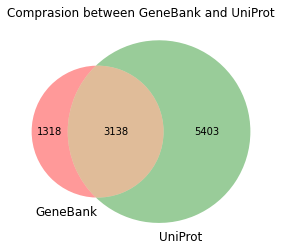


Section B: 
Transmembrance areas:
Min:  10 , Max:  43
Average:  20.395294338207723


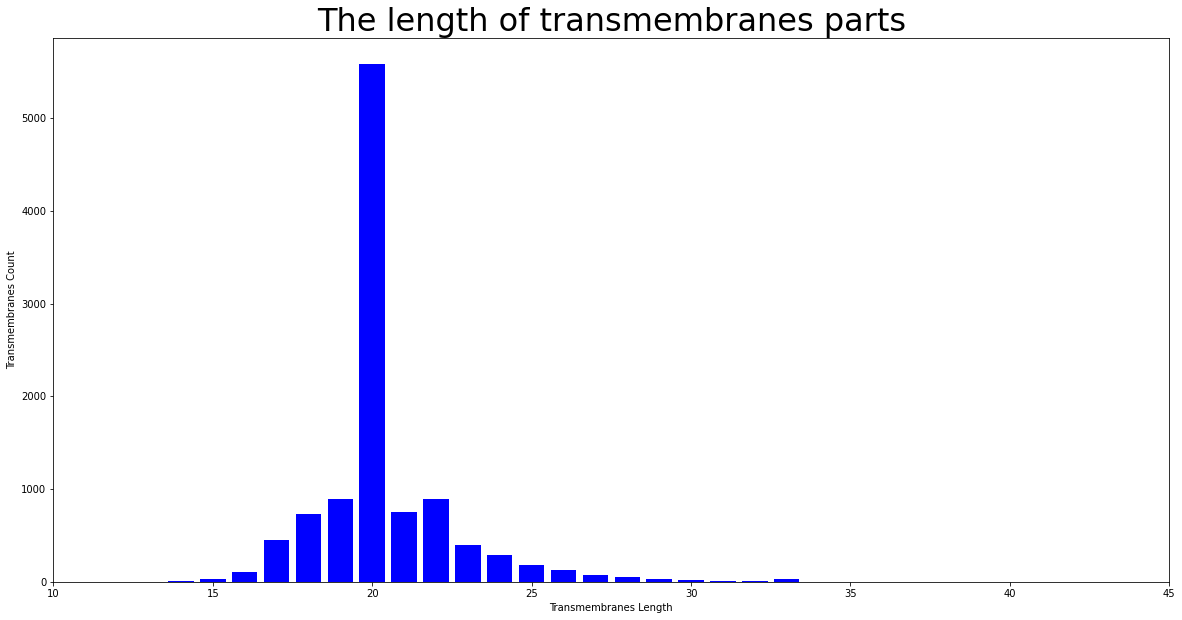

The average of the hydrophobic amino acids percents is:  70.03451651599204 %

Section C: 
{41.64222873900293: 1, 46.42857142857143: 2, 49.41520467836257: 2, 42.89405684754522: 1, 36.119116234390006: 1, 45.41387024608501: 1, 47.46075715604802: 1, 41.050903119868636: 1, 45.751633986928105: 1, 30.81232492997199: 1, 47.72079772079772: 1, 43.56884057971014: 1, 36.02150537634409: 1, 46.93165969316597: 1, 47.235772357723576: 1, 47.81297134238311: 1, 43.73522458628842: 2, 47.230614300100704: 1, 47.6038338658147: 1, 43.506493506493506: 1, 50.36075036075036: 1, 42.87317620650954: 1, 45.23809523809524: 1, 41.142191142191145: 1, 41.830065359477125: 1, 41.17647058823529: 1, 44.303797468354425: 1, 44.61538461538462: 1, 32.467532467532465: 1, 34.40860215053764: 1, 47.18100890207715: 1, 49.63768115942029: 1, 37.42454728370221: 1, 47.59793052475979: 1, 44.46529080675422: 1, 40.852130325814535: 1, 42.434988179669034: 1, 46.330275229357795: 1, 41.74382716049383: 1, 39.959839357429715: 1, 41.3716814159292

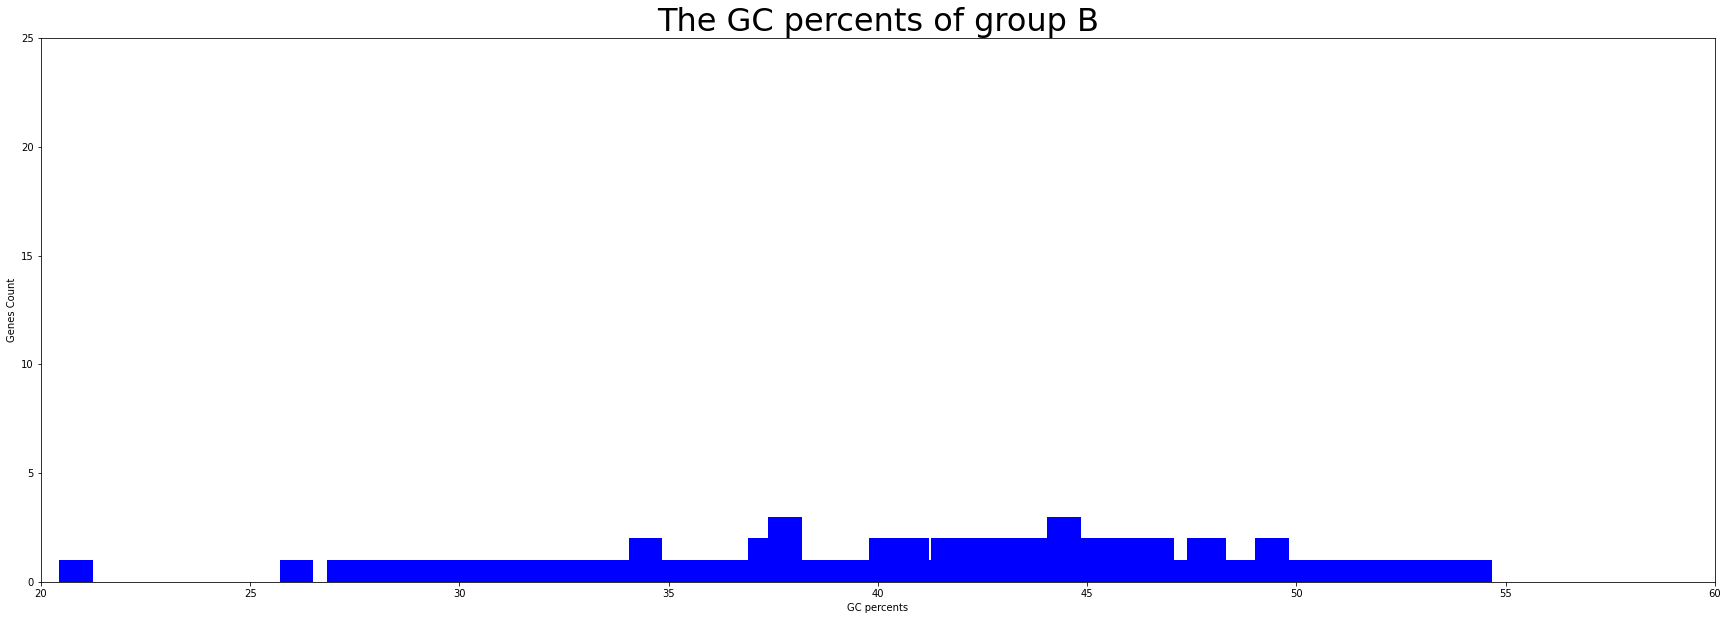

A group statistics:
Min:  20.833333333333336 , Max:  56.438026474127554 , Median:  43.890865954922894 , Average:  43.11909785405482

B group statistics:
Min:  20.833333333333336 , Max:  54.263565891472865 , Median:  43.82716049382716 , Average:  43.040212766534076


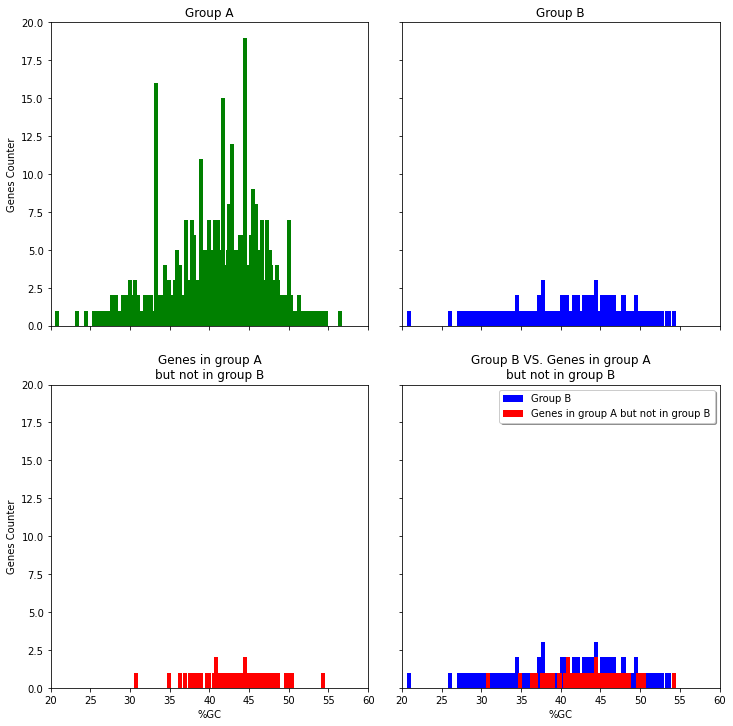

In [ ]:
gene_names_gb = set()
for rec in records:
  for feature in rec.features:
    if not feature.type == 'source' and feature.qualifiers.get("gene"):
      gene_names_gb.add(feature.qualifiers.get("gene")[0].lower())

gene_names_up = set()
for gene_name in df_uniprot["Entry name"]:
  gene_names_up.add(gene_name.lower()[0:-6].lower())


def merge_proteins_codes():
  """
  Compares GeneBank and UniPort codes and prints the diffrences.
  Draws representation for the gaps.

  Parameters:
  None

  Returns:
  None
  """
  only_in_gb = gene_names_gb.difference(gene_names_up)
  only_in_up = gene_names_up.difference(gene_names_gb)
  venn2([gene_names_gb, gene_names_up], set_labels=('GeneBank', 'UniProt'))
  plt.title("Comprasion between GeneBank and UniProt")
  plt.show()


def get_transmembrane_sequence():
  """
  Get all the transmembrane sequences from the protein sequences.
  Draws histogram for their lengths' distribution.
  Prints the average of the lengths, the minimum length and the maximum length.
  Prints the average of the lengths of the hydrophobic amino acids.

  Parameters:
  None

  Returns:
  None
  """
  transmembranes_col = df_uniprot['Transmembrane'].dropna()
  transmembranes = []
  trans_lengths_dict = {}
  for transmembrane in transmembranes_col:
    str1 = transmembrane
    places_trans = [m.start() for m in re.finditer('TRANSMEM', str1)]
    for place in places_trans:
      sub = str1[place + 9 :]
      sub = sub[: sub.find(";")]
      start = int(sub[: sub.find(".")])
      end = int(sub[sub.find(".") + 2:])
      length = end - start
      if not length in trans_lengths_dict:
        trans_lengths_dict[length] = 1
      else:
        trans_lengths_dict[length] += 1
  max = list(trans_lengths_dict.keys())[0]
  min = list(trans_lengths_dict.keys())[0]
  sum = 0
  number_of_trans = 0
  for key in trans_lengths_dict:
    sum += trans_lengths_dict[key] * key
    number_of_trans += trans_lengths_dict[key]
    if key > max:
      max = key
    if key < min:
      min = key
  print("Transmembrance areas:")
  print("Min: ", min, ", Max: ", max)
  average = sum / number_of_trans
  print("Average: ", average)

  f = plt.figure()
  f.set_figwidth(20)
  f.set_figheight(10)

  ax1 = plt.axes()
  ax1.bar(trans_lengths_dict.keys(), trans_lengths_dict.values(), color = 'blue')
  plt.xlim([10, 45])
  # plt.ylim([0, 25])
  ax1.set_xlabel('Transmembranes Length')
  ax1.set_ylabel('Transmembranes Count')
  ax1.set_title("The length of transmembranes parts", size = 32)
  plt.show()

  seq_list = []
  mini_table = df_uniprot[['Transmembrane', 'Sequence']].dropna()
  for key, val in mini_table.iterrows():
    places_list = []
    for str1 in val.items():
      str1 = str1[1]
      if str1.startswith('TRANSMEM'):
        places_trans = [m.start() for m in re.finditer('TRANSMEM', str1)]
        for place in places_trans:
          sub = str1[place + 9 :]
          sub = sub[: sub.find(";")]
          start = int(sub[: sub.find(".")])
          end = int(sub[sub.find(".") + 2:])
          length = end - start
          places_list.append((start,end))
      else:
        for place in places_list:
          seq_list.append(str1[place[0]:place[1]])

  total_length = 0
  hydrophobic_sum = 0
  for seq in seq_list:
    total_length += len(seq)
    for amino_acid in seq:
      if amino_acid in hydrophobic_amino_acids:
        hydrophobic_sum += 1

  print("The average of the hydrophobic amino acids percents is: ",
        ((hydrophobic_sum / total_length) * 100) , "%")



def comparsion_A_and_B_groups():
  """
  A - The CDS genes.
  B - The genes that contain at least one transmembrane area from the genes
  sequences that appear in both GeneBank and UniProt.

  Print the %GC of group B.
  Compare the two groups in the next parameters: average,median, minimum, maximum.
  Draw histogram for both %GC distribution of groups A and B
  for the next genes groups:
      1. Group A
      2. Group B
      3. Genes in group A but not in group B
      4. Group B AND Genes in group A but not in group B (On the same graph)

  Parameters:
  None

  Returns:
  None
  """
  A = set()
  for rec in records:
    for feature in rec.features:
      if feature.type == 'CDS' and feature.qualifiers.get("gene"):
        A.add(feature.qualifiers.get("gene")[0])      

  intersect = gene_names_gb.intersection(gene_names_up)
  with_trans_up = set()
  mini_table = df_uniprot[['Entry name', 'Transmembrane']].dropna()
  for key, val in mini_table.iterrows():
    with_trans_up.add(val[0].lower()[:-6])

  B = intersect.intersection(with_trans_up)
  GC_percents = {}
  counter_GC = 0
  for gene_name in B:
    for rec in records:
      for feature in rec.features:
        if feature.qualifiers.get("gene") and feature.type != 'CDS':
          if feature.qualifiers.get("gene")[0].lower() == gene_name:
            CDS_gene = rec.seq[feature.location.start:feature.location.end]
            counter_GC += CDS_gene.count('G') 
            counter_GC += CDS_gene.count('C')
            GC_percents[feature.location.start] = (counter_GC / len(CDS_gene)) * 100
            counter_GC = 0

  GC_percents_dict = {}
  for percent in GC_percents.values():
    if not percent in GC_percents_dict:
      GC_percents_dict[percent] = 1
    else:
      GC_percents_dict[percent] += 1
  print(GC_percents_dict)

  f = plt.figure()
  f.set_figwidth(30)
  f.set_figheight(10)

  ax1 = plt.axes()
  ax1.bar(GC_percents_dict.keys(), GC_percents_dict.values(), color = 'blue')
  plt.xlim([20, 60])
  plt.ylim([0, 25])
  ax1.set_xlabel('GC percents')
  ax1.set_ylabel('Genes Count')
  ax1.set_title("The GC percents of group B", size = 32)
  plt.show()

  A_list = []
  for gene in GC_percents_protein_coding_genes:
    A_list.append(GC_percents_protein_coding_genes[gene])
  A_list = sorted(A_list)
  min_A = A_list[0]
  max_A = A_list[-1]
  median_A = A_list[math.floor(len(A_list) / 2)]
  average_A = sum(A_list) / len(A_list)

  B_list = []
  for gene in GC_percents:
    B_list.append(GC_percents[gene])
  B_list = sorted(B_list)
  min_B = B_list[0]
  max_B = B_list[-1]
  median_B = B_list[math.floor(len(B_list) / 2)]
  average_B = sum(B_list) / len(B_list)

  print('A group statistics:')
  print('Min: ', min_A, ', Max: ', max_A, ', Median: ', median_A, ', Average: ', average_A)
  print()
  print('B group statistics:')
  print('Min: ', min_B, ', Max: ', max_B, ', Median: ', median_B, ', Average: ', average_B)

  A_dict = {}
  for percent in A_list:
    if percent not in A_dict:
      A_dict[percent] = 1
    else:
      A_dict[percent] += 1

  B_dict = {}
  for percent in B_list:
    if percent not in B_dict:
      B_dict[percent] = 1
    else:
      B_dict[percent] += 1

  third_set = A.difference(B)
  third_dict = {}
  counter_GC = 0
  for gene_name in third_set:
    for rec in records:
      for feature in rec.features:
        if feature.qualifiers.get("gene") and feature.type == 'CDS':
          if feature.qualifiers.get("gene")[0].lower() == gene_name:
            gene = rec.seq[feature.location.start:feature.location.end]
            counter_GC += gene.count('G') 
            counter_GC += gene.count('C')
            percent = (counter_GC / len(gene)) * 100
            if percent not in third_dict:
              third_dict[percent] = 1
            else: 
              third_dict[percent] += 1
            counter_GC = 0

  sorted_third_dict = sorted(third_dict.items())
  third_dict = {}
  for tup in sorted_third_dict:
    third_dict[tup[0]] = tup[1]

  fig, axs = plt.subplots(2, 2, figsize=(10,10))
  axs[0, 0].bar(A_dict.keys(), A_dict.values(), width=0.5, color='g')
  axs[0, 0].set_title('Group A')
  axs[0, 1].bar(B_dict.keys(), B_dict.values(), width=0.5, color='b')
  axs[0, 1].set_title('Group B')
  axs[1, 0].bar(third_dict.keys(), third_dict.values(), width=0.5, color='r')
  axs[1, 0].set_title('Genes in group A\nbut not in group B')
  axs[1, 1].bar(B_dict.keys(), B_dict.values(), width=0.5, color='b')
  axs[1, 1].bar(third_dict.keys(), third_dict.values(), width=0.5, color='r')
  axs[1, 1].set_title('Group B VS. Genes in group A\nbut not in group B')
  axs[1, 1].legend(('Group B', 'Genes in group A but not in group B'),
                   loc='upper right', shadow=True)
  fig.tight_layout()

  for ax in axs.flat:
    ax.set(xlabel='%GC', ylabel='Genes Counter')
    ax.axis(xmin = 20, xmax = 60, ymin = 0, ymax = 20)

  # Hide x labels and tick labels for top plots and y ticks for right plots.
  for ax in axs.flat:
    ax.label_outer()

print("Section A: ")
merge_proteins_codes()
print()
print("Section B: ")
get_transmembrane_sequence()
print()
print("Section C: ")
comparsion_A_and_B_groups()

# **Part C:** Coronavirus

In [ ]:
gencode = {
    'ATA': 'I', 'ATC': 'I', 'ATT': 'I', 'ATG': 'M',
    'ACA': 'T', 'ACC': 'T', 'ACG': 'T', 'ACT': 'T',
    'AAC': 'N', 'AAT': 'N', 'AAA': 'K', 'AAG': 'K',
    'AGC': 'S', 'AGT': 'S', 'AGA': 'R', 'AGG': 'R',
    'CTA': 'L', 'CTC': 'L', 'CTG': 'L', 'CTT': 'L',
    'CCA': 'P', 'CCC': 'P', 'CCG': 'P', 'CCT': 'P',
    'CAC': 'H', 'CAT': 'H', 'CAA': 'Q', 'CAG': 'Q',
    'CGA': 'R', 'CGC': 'R', 'CGG': 'R', 'CGT': 'R',
    'GTA': 'V', 'GTC': 'V', 'GTG': 'V', 'GTT': 'V',
    'GCA': 'A', 'GCC': 'A', 'GCG': 'A', 'GCT': 'A',
    'GAC': 'D', 'GAT': 'D', 'GAA': 'E', 'GAG': 'E',
    'GGA': 'G', 'GGC': 'G', 'GGG': 'G', 'GGT': 'G',
    'TCA': 'S', 'TCC': 'S', 'TCG': 'S', 'TCT': 'S',
    'TTC': 'F', 'TTT': 'F', 'TTA': 'L', 'TTG': 'L',
    'TAC': 'Y', 'TAT': 'Y', 'TAA': '_', 'TAG': '_',
    'TGC': 'C', 'TGT': 'C', 'TGA': '_', 'TGG': 'W'}

In [ ]:
def load_covid_data(accession_number):
  """
  Loads a GeneBank file within accession number.

  Parameters:
  accession_number(string): The accession number of a Genebank file.

  Returns:
  None
  """ 
  Entrez.email = "elad.david5@gmail.com"
  file_name = accession_number + ".gb"
  if not os.path.isfile(file_name):
      with Entrez.efetch(db="nucleotide", id=accession_number, rettype="gb",
                         retmode="text")as in_handle:
          with open(file_name, "w") as out_handle:
              out_handle.write(in_handle.read())


def load_two_versions_of_the_coronavirus():
  """
  Loads 2 GeneBank codes of the coronavirus:
    1. The genome of the corona-virus from July 2020.
    2. The genome of the corona-virus from January 2022.

  Parameters:
  None

  Returns:
  None
  """ 
  load_covid_data('NC_045512.2')
  load_covid_data('LC666924.1')

load_two_versions_of_the_coronavirus()

**Question 1:** 

In [ ]:
def synonymous_mutations():
  """
  Calculates for each codon how many positions are synonymous.

  Parameters:
  None

  Returns:
  synonymous_dict(dictionary): The keys are the different codons and the values
  are the number of their appearances.
  """
  synonymous_dict = {}
  for codon in gencode:
    synonymous_dict[codon] = synonymous_count(codon)
  return synonymous_dict


def synonymous_count(codon):
  """
  Returns how many postions are synonymous.

  Parameters:
  codon(string): 3 letters representing nucleotides.

  Returns:
  syn_positions(float): The number of synonymous positions of the given codon.
  """
  assert len(codon) == 3, 'Invalid codon length'

  syn_count = 0
  nsyn_count = 0
  nucleotides_set = {'A', 'C', 'G', 'T'}

  for position in range(3):
    for nuc in nucleotides_set.difference(codon[position]):
      syn_type = position_is_synonymous(codon, position, nuc)
      if syn_type == 1:
        syn_count += 1
      elif syn_type == -1:
        nsyn_count += 1
    
  syn_positions = (syn_count * 3) / (syn_count + nsyn_count)
  return syn_positions


def position_is_synonymous(codon, position, nuc):
  """
  Returns the type of the transion of the nucleotide in the postion- synonymous/ not synonymous/ stop codon.

  Parameters:
  codon(string): 3 letters representing nucleotides.
  position(int): the position in the codon
  nuc(char): new nucleotide
 
  Returns:
  int that represents:
    1 for synonymous 
    -1 for not synonymous
    0 for stop codon 
  """
  prev_amino_acid = gencode[codon]
  new_amino_acid = gencode[codon[:position] + nuc + codon[position + 1:]]
  if new_amino_acid == prev_amino_acid:
      return 1
  elif new_amino_acid == '_':
      return 0
  elif new_amino_acid != prev_amino_acid:
      return -1

synonymous_dict = synonymous_mutations()
print(synonymous_dict)

{'ATA': 0.6666666666666666, 'ATC': 0.6666666666666666, 'ATT': 0.6666666666666666, 'ATG': 0.0, 'ACA': 1.0, 'ACC': 1.0, 'ACG': 1.0, 'ACT': 1.0, 'AAC': 0.3333333333333333, 'AAT': 0.3333333333333333, 'AAA': 0.375, 'AAG': 0.375, 'AGC': 0.3333333333333333, 'AGT': 0.3333333333333333, 'AGA': 0.75, 'AGG': 0.6666666666666666, 'CTA': 1.3333333333333333, 'CTC': 1.0, 'CTG': 1.3333333333333333, 'CTT': 1.0, 'CCA': 1.0, 'CCC': 1.0, 'CCG': 1.0, 'CCT': 1.0, 'CAC': 0.3333333333333333, 'CAT': 0.3333333333333333, 'CAA': 0.375, 'CAG': 0.375, 'CGA': 1.5, 'CGC': 1.0, 'CGG': 1.3333333333333333, 'CGT': 1.0, 'GTA': 1.0, 'GTC': 1.0, 'GTG': 1.0, 'GTT': 1.0, 'GCA': 1.0, 'GCC': 1.0, 'GCG': 1.0, 'GCT': 1.0, 'GAC': 0.3333333333333333, 'GAT': 0.3333333333333333, 'GAA': 0.375, 'GAG': 0.375, 'GGA': 1.125, 'GGC': 1.0, 'GGG': 1.0, 'GGT': 1.0, 'TCA': 1.2857142857142858, 'TCC': 1.0, 'TCG': 1.125, 'TCT': 1.0, 'TTC': 0.3333333333333333, 'TTT': 0.3333333333333333, 'TTA': 0.8571428571428571, 'TTG': 0.75, 'TAC': 0.428571428571428

**Question 2:**

In [ ]:
data_path = '/content/NC_045512.2.gb'
records_july_2020 = load_data(data_path)

data_path = '/content/LC666924.1.gb'
records_jan_2022 = load_data(data_path)


def copmare_coronavirus_genes():
  """
  Compares the GeneBank's genetic code of the corona-virus
  from July 2020 and January 2022.
  Prints how many common genes are to them and
  what genes appear only in one of them.

  Parameters:
  None

  Returns:
  None
  """
  gene_names_2020 = set()
  for rec_2020 in records_july_2020:
    for feature in rec_2020.features:
      if feature.qualifiers.get("gene"):
        gene_names_2020.add(feature.qualifiers.get("gene")[0])

  gene_names_2022 = set()
  for rec_2022 in records_jan_2022:
     for feature in rec_2022.features:
        if feature.qualifiers.get("gene"):
          gene_names_2022.add(feature.qualifiers.get("gene")[0])
  print(gene_names_2020)
  print(gene_names_2022)
  print("Equal!")


def DNDS_five_common_genes():
  """
  Compares five genes of the corona virus that arer common to
  July 2020 and January 2022.
  Prints a table with the genes' details (name, role and etc.), the dN/dS result
  and if in the genes accoured a positive/ nuetrual/ negative selection.   

  Parameters:
  None

  Returns:
  None
  """
  corona_genome_seq_2022 = ""
  corona_genome_seq_2020 = ""
  five_genes_list = []
  
  for rec_2022 in records_jan_2022:
    corona_genome_seq_2022 = rec_2022.seq
  for rec_2020 in records_july_2020:
    corona_genome_seq_2020 = rec_2020.seq
    for feature in rec_2020.features:
      if feature.type == "CDS":
        curr_list = []
        curr_seq_2020 = ""
        curr_seq_2022 = ""
        curr_list.append(feature.qualifiers.get("gene")[0])
        curr_list.append(feature.qualifiers.get("product")[0])
        curr_list.append(feature.qualifiers.get("protein_id")[0])
        curr_list.append(feature.location.strand)
        curr_list.append(feature.location.start)
        curr_list.append(feature.location.end)
        curr_list.append(feature.qualifiers.get("translation")[0])  
        curr_seq_2020 = corona_genome_seq_2020[feature.location.start : feature.location.end] 
        for rec_2022 in records_jan_2022:
          for feature_2022 in rec_2022.features:
            if feature_2022.qualifiers.get("gene"):
              if feature_2022.qualifiers.get("gene")[0] == feature.qualifiers.get("gene")[0]:
                curr_seq_2022 = corona_genome_seq_2022[feature_2022.location.start : feature_2022.location.end]
                if feature_2022.qualifiers.get("translation"):
                  curr_list.append(feature_2022.qualifiers.get("translation")[0]) 
        curr_list.append(curr_seq_2020) 
        curr_list.append(curr_seq_2022) 
        five_genes_list.append(curr_list)
        
  for curr_list in five_genes_list:
    old_trans = curr_list[-4]
    new_trans = curr_list[-3]

    aligner = Align.PairwiseAligner()
    aligner.substitution_matrix = substitution_matrices.load("BLOSUM62")
    alignments = aligner.align(old_trans, new_trans)
    alignment = str(alignments[0])
    seq_1 = alignment[:alignment.find("\n")]
    seq_2 = alignment[int((len(alignment) / 3) * 2): -1]
    curr_list[-4] = seq_1
    curr_list[-3] = seq_2

    if len(seq_1) != len(seq_2):
      print("ERROR: Differenet lengths of amino acids translation sequences.")

    old_dna = ""
    counter = 0
    for codon in seq_1:
      if codon == '-':
        old_dna += "---"
      else:
        old_dna += curr_list[-2][counter : counter + 3]
        counter += 3

    new_dna = ""
    counter = 0
    for codon in seq_2:
      if codon == '-':
        new_dna += "---"
      else:
        new_dna += curr_list[-1][counter : counter + 3]
        counter += 3

    curr_list[-2] = old_dna
    curr_list[-1] = new_dna

  five_genes = five_genes_list[-6:]
  for gene in five_genes:
    old_dna = gene[-2]
    new_dna = gene[-1]
    seq1 = CodonSeq(old_dna)
    seq2 = CodonSeq(new_dna)
    print(seq1)
    print(seq2)
    print()
    dN, dS = cal_dn_ds(seq1, seq2)
    # print("dN:%0.3f " % dN)
    # print("dS:%0.3f " % dS)
    if dS != 0:
      dN_dS_ratio = float(dN/ dS)
    else:
      dN_dS_ratio = 0
    if dS == dN:
      dN_dS_ratio = 1
    # print("dN/dS:%0.3f " % dN_dS_ratio)
    gene.append(dN)  
    gene.append(dS)  
    gene.append(dN_dS_ratio)  
  print(five_genes)

  table_data = []
  for gene in five_genes:
    curr_row = [gene[0], gene[1], gene[2], gene[3], gene[4], gene[5], gene[-3],
                gene[-2], gene[-1]]
    if gene[-1] <= 1.05 and gene[-1] >= 0.95:
      if gene[-3] == 0 and gene[-2] == 0:
        curr_row.append('Neutral/ Invalid')
      else:
        curr_row.append('Neutral')
    elif gene[-1] > 1.05:
      curr_row.append('Positive')
    elif gene[-1] < 0.95:
      curr_row.append('Negative')
    table_data.append(curr_row)

  print()
  print(tabulate(table_data, headers=['Name', 'Product', 'Protein ID', 'Strand',
                'Start Loc.', 'End Loc.','dN', 'dS', 'dN/dS Ratio',
                 'Selection'], tablefmt='orgtbl'))
  

print("Section A: ")
copmare_coronavirus_genes()
print()
print("Section B: ")
DNDS_five_common_genes()

Section A: 
{'ORF8', 'ORF1ab', 'ORF7a', 'ORF6', 'N', 'S', 'ORF7b', 'ORF3a', 'M', 'E', 'ORF10'}
{'ORF8', 'ORF1ab', 'ORF7a', 'ORF6', 'N', 'S', 'ORF7b', 'ORF3a', 'M', 'E', 'ORF10'}
Equal!

Section B: 
ATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTACTAATTATTATGAGGACTTTTAAAGTTTCCATTTGGAATCTTGATTACATCATAAACCTCATAATTAAAAATTTATCTAAGTCACTAACTGAGAATAAATATTCTCAATTAGATGAAGAGCAACCAATGGAGATTGAT
ATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTACTAATTATTATGAGGACTTTTAAAGTTTCCATTTGGAATCTTGATTACATCATAAACCTCATAATTAAAAATTTATCTAAGTCACTAACTGAGAATAAATATTCTCAATTAGATGAAGAGCAACCAATGGAGATTGAT

ATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTGAGCTTTATCACTACCAAGAGTGTGTTAGAGGTACAACAGTACTTTTAAAAGAACCTTGCTCTTCTGGAACATACGAGGGCAATTCACCATTTCATCCTCTAGCTGATAACAAATTTGCACTGACTTGCTTTAGCACTCAATTTGCTTTTGCTTGTCCTGACGGCGTAAAACACGTCTATCAGTTACGTGCCAGATCAGTT---TCACCTAAACTGTTCATCAGACAAGAGGAAGTTCAAGAACTTTACTCTCCAATTTTTCTTATTGTTGCGGCAATAGTGTTTATAACACTTTGCTTCACACTCAAAAGAAAGACA---GAA
ATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTGAGCTTTATCACTACCAA